In [320]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [317]:
df = read_csv('Data/service_request_compare/sr_hex.csv')

In [318]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]

In [261]:
df2 = df2[['CreationTimestamp','h3_level8_index','NotificationType']]

In [262]:
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]

In [263]:
#df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)

In [264]:
df2.insert(loc=2, column='Total_Requests',value=1)

In [265]:
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])

In [266]:
#df2.dtypes

In [267]:
df3 = pd.DataFrame(df2)

In [268]:
df3.dtypes

CreationTimestamp    datetime64[ns]
h3_level8_index              object
Total_Requests                int64
NotificationType             object
dtype: object

In [269]:
df3 = df3.set_index('CreationTimestamp').last('12M').reset_index()

In [270]:
df3.head(2)

,CreationTimestamp,h3_level8_index,Total_Requests,NotificationType
0,2019-01-01,88ad36d5a9fffff,1,C3
1,2019-01-01,88ad361307fffff,1,C3


In [271]:
#df3 = pd.DataFrame(df3)

In [272]:
df_Type = df3.groupby(['NotificationType', pd.Grouper(key='CreationTimestamp', freq='D')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df_Type)

    NotificationType CreationTimestamp  Total_Requests
0                 C3        2019-01-01             539
1                 C3        2019-01-02            1641
2                 C3        2019-01-03            1694
3                 C3        2019-01-04            1611
4                 C3        2019-01-05             616
..               ...               ...             ...
360               C3        2019-12-27            1157
361               C3        2019-12-28             622
362               C3        2019-12-29             652
363               C3        2019-12-30            1823
364               C3        2019-12-31            1211

[365 rows x 3 columns]


In [273]:
df_Hex = df3.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='D')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df_Hex)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2019-01-01              43
87735   88ad361765fffff        2019-01-01               2
87200   88ad361757fffff        2019-01-01               1
87083   88ad361755fffff        2019-01-01               3
86756   88ad361749fffff        2019-01-01               1
...                 ...               ...             ...
172393  88ad36c4c9fffff        2019-12-31               1
82441   88ad361569fffff        2019-12-31               1
152190  88ad368d8dfffff        2019-12-31               1
82692   88ad36156bfffff        2019-12-31               2
143824  88ad368c47fffff        2019-12-31               1

[197288 rows x 3 columns]


In [277]:
df_Type =  df_Type.drop(['NotificationType'], axis=1)

In [278]:
# prepare expected column names
df_Type.columns = ['ds', 'y']

In [304]:
model = Prophet(daily_seasonality=True)

train, test = train_test_split(df_Type, test_size = 0.05, shuffle=False)
model_fit = model.fit (train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [305]:
future = model_fit.make_future_dataframe(periods=20, freq='D')
predictions = model_fit.predict(future)

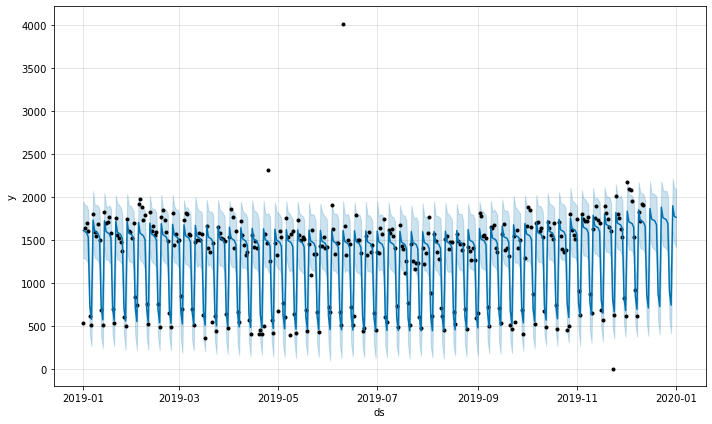

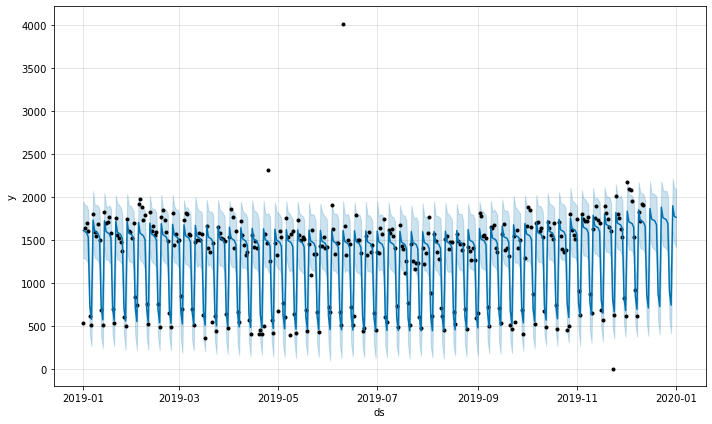

In [306]:
model_fit.plot(predictions)

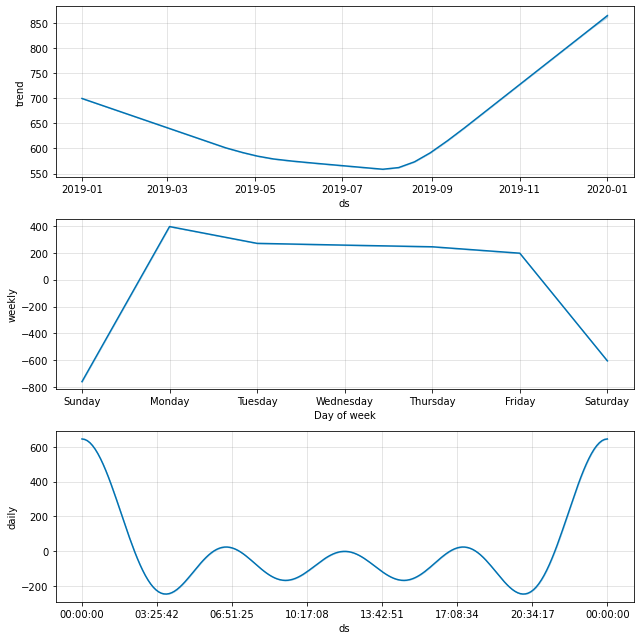

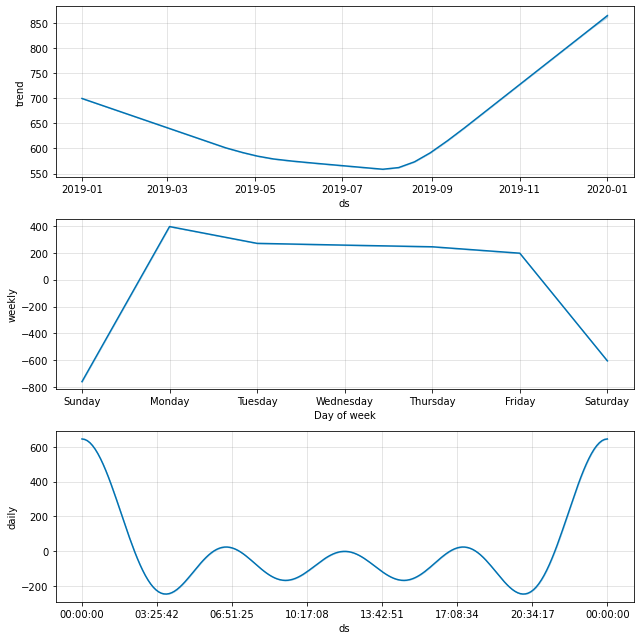

In [307]:
model_fit.plot_components(predictions)

In [308]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)

In [309]:
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()


Final Answer:


,date,Service Requests Expected
361,2019-12-28,897.0
362,2019-12-29,744.0
363,2019-12-30,1899.0
364,2019-12-31,1776.0
365,2020-01-01,1765.0


In [310]:
df_Type.tail()

,ds,y
360,2019-12-27,1157
361,2019-12-28,622
362,2019-12-29,652
363,2019-12-30,1823
364,2019-12-31,1211
